In [22]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# tf.enable_eager_execution()


from tensorflow import feature_column
from tensorflow.keras import layers
# tf.disable_v2_behavior()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

from patsy import dmatrices

%matplotlib inline

In [23]:
dataframe = pd.read_csv("doginfo.csv")
dataframe.head()

,kindCd,neuterYn,sexCd,weight,noticeDays,age2,processState
0,푸들,N,F,7.46,10,12,0
1,믹스견,N,M,7.00,14,1,1
2,믹스견,U,M,4.50,11,2,0
3,진도견,N,M,10.00,8,1,0
4,믹스견,N,M,6.00,8,4,0


In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kindCd        22792 non-null  object 
 1   neuterYn      22792 non-null  object 
 2   sexCd         22792 non-null  object 
 3   weight        22792 non-null  float64
 4   noticeDays    22792 non-null  int64  
 5   age2          22792 non-null  int64  
 6   processState  22792 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ MB


In [25]:
dataframe.isnull().sum()

kindCd          0
neuterYn        0
sexCd           0
weight          0
noticeDays      0
age2            0
processState    0
dtype: int64

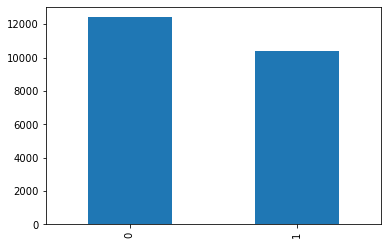

In [26]:
dataframe['processState'].value_counts().plot(kind='bar')
plt.show()

In [27]:
category_feature = [ col for col in dataframe.columns if dataframe[col].dtypes == "object"]
category_feature

['kindCd', 'neuterYn', 'sexCd']

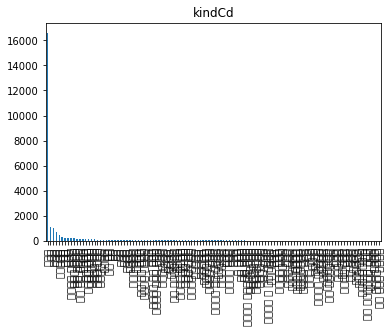

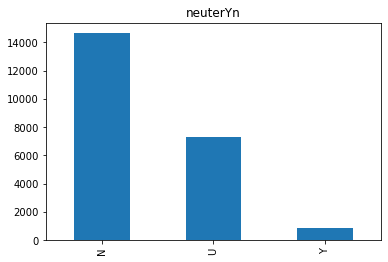

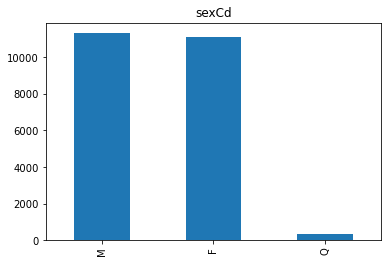

In [29]:
for col in category_feature: 
    dataframe[col].value_counts().plot(kind='bar') 
    plt.title(col) 
    plt.show()

In [36]:
y, X = dmatrices('processState ~ + kindCd + neuterYn + sexCd + weight + noticeDays + age2', dataframe, return_type="dataframe")
print(y)

y = np.ravel(y)
print(y)

       processState
0               0.0
1               1.0
2               0.0
3               0.0
4               0.0
...             ...
22787           1.0
22788           1.0
22789           1.0
22790           0.0
22791           0.0

[22792 rows x 1 columns]
[0. 1. 0. ... 1. 0. 0.]


In [39]:
print(dataframe)
print(type(dataframe))

# data=np.array(dataframe)
# print(data)
# print(type(data))

      kindCd neuterYn sexCd  weight  noticeDays  age2  processState
0         푸들        N     F    7.46          10    12             0
1        믹스견        N     M    7.00          14     1             1
2        믹스견        U     M    4.50          11     2             0
3        진도견        N     M   10.00           8     1             0
4        믹스견        N     M    6.00           8     4             0
...      ...      ...   ...     ...         ...   ...           ...
22787    믹스견        N     M    1.00          10     0             1
22788    믹스견        N     M    1.00          10     0             1
22789    믹스견        N     M    1.00          10     0             1
22790     푸들        U     F    6.00          12     3             0
22791    믹스견        N     M    3.50          10     0             0

[22792 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>


TypeError: '(slice(None, None, None), slice(None, 6, None))' is an invalid key